<a href="https://colab.research.google.com/github/praveenpoluri/CS5590-0004/blob/master/Deep_Learning_Lesson6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32 
encoding_dim1 = 64 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded1 = Dense(encoding_dim1, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded1)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: ignored

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.5274 - val_loss: 0.4547
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.4222 - val_loss: 0.4039
Epoch 3/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.3929 - val_loss: 0.3852
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3756 - val_loss: 0.3699
Epoch 5/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3619 - val_loss: 0.3577


In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l1

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(encoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

#first = Dense(256, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(first)
#first_2 = Dense(256, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(784, activation='sigmoid')(first_2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3359 - acc: 0.7530 - val_loss: 0.2652 - val_acc: 0.7908
Epoch 2/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2571 - acc: 0.7948 - val_loss: 0.2439 - val_acc: 0.7919
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.2265 - acc: 0.7939 - val_loss: 0.2105 - val_acc: 0.7935
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2036 - acc: 0.7958 - val_loss: 0.1945 - val_acc: 0.7958
Epoch 5/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1887 - acc: 0.7985 - val_loss: 0.1812 - val_acc: 0.7991


In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l1

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu', activity_regularizer=l1(0.001))(encoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

#first = Dense(256, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(first)
#first_2 = Dense(256, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(784, activation='sigmoid')(first_2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
11493376/11490434 [==============================] - 2s 0us/step



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 6s 105us/step - loss: 0.6986 - acc: 0.7941 - val_loss: 0.6485 - val_acc: 0.8030
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.6283 - acc: 0.8043 - val_loss: 0.6090 - val_acc: 0.8030
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.5916 - acc: 0.8043 - val_loss: 0.5749 - val_acc: 0.8030
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.5598 - acc: 0.8044 - val_loss: 0.5454 - val_acc: 0.8030
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.5323 - acc: 0.8042 - val_loss: 0.5198 - val_acc: 0.8030


In [0]:
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

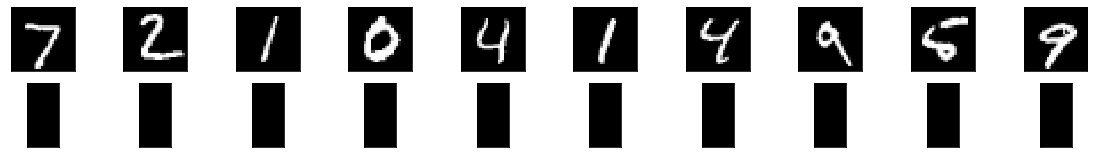

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3543 - acc: 0.7531 - val_loss: 0.2689 - val_acc: 0.7955
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2629 - acc: 0.7950 - val_loss: 0.2488 - val_acc: 0.7973
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2422 - acc: 0.7956 - val_loss: 0.2273 - val_acc: 0.7962
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2238 - acc: 0.7961 - val_loss: 0.2098 - val_acc: 0.7984
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2101 - acc: 0.7970 - val_loss: 0.1976 - val_acc: 0.7993
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2009 - acc: 0.7978 - val_loss: 0.1890 - val_acc: 0.8006
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1940 - acc: 0.7988 - val_loss: 0.1819 - val_acc

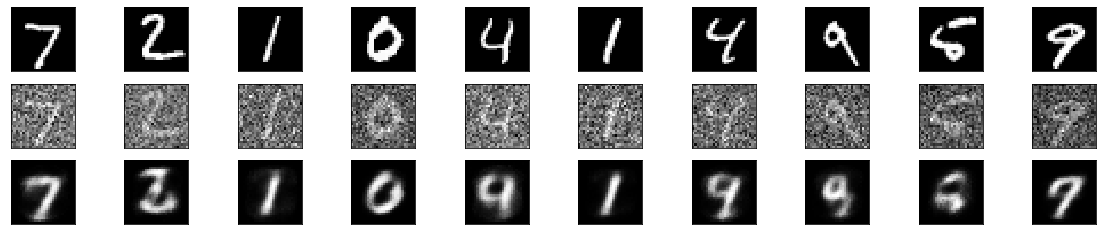

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

tensorboard = TensorBoard(log_dir='2', histogram_freq=0, write_graph=True, write_images=False)
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          callbacks=[tensorboard],
                          validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy data
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

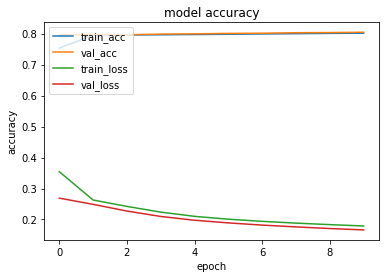

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()